<a href="https://colab.research.google.com/github/tanisaur/ML_zoomcamp/blob/main/ML_Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read in data

In [4]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!unzip bank+marketing.zip
!unzip bank.zip

--2024-10-21 00:31:09--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  3.39MB/s    in 0.3s    

2024-10-21 00:31:09 (3.39 MB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [5]:
#import libraries for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
#read in bank-full.csv
df = pd.read_csv('bank-full.csv', sep=';')
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [9]:
df_bank = df[[
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]]

df_bank.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [11]:
X = df_bank.drop('y', axis=1)
y = df_bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print(f"Train data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Test data: {X_test.shape}")

Train data: (27126, 14)
Validation data: (9042, 14)
Test data: (9043, 14)


#Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
    Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

    balance
    day
    duration
    previous


In [14]:
from sklearn.metrics import roc_auc_score

numerical_features = ['balance', 'day', 'duration', 'previous']
auc_scores = {}

for feature in numerical_features:
    auc = roc_auc_score(y_train, X_train[feature])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[feature])
    auc_scores[feature] = auc

print("AUC scores for numerical features:")
for feature, auc in auc_scores.items():
    print(f"{feature}: {auc}")

# Find the feature with the highest AUC
highest_auc_feature = max(auc_scores, key=auc_scores.get)
print(f"\nThe feature with the highest AUC is: {highest_auc_feature}")

AUC scores for numerical features:
balance: 0.5888313805382317
day: 0.525957882383908
duration: 0.8147002759670778
previous: 0.5985653242764153

The feature with the highest AUC is: duration


#Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.69
    0.79
    0.89
    0.99


In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Convert the training data to a list of dictionaries
train_dicts = X_train.to_dict(orient='records')

# Create a DictVectorizer and fit it to the training data
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)

# Train the logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Convert the validation data to a list of dictionaries
val_dicts = X_val.to_dict(orient='records')

# Transform the validation data using the fitted DictVectorizer
X_val_encoded = dv.transform(val_dicts)

# Make predictions on the validation data
y_pred_val = model.predict_proba(X_val_encoded)[:, 1]

# Calculate the AUC on the validation data
auc_val = roc_auc_score(y_val, y_pred_val)

print(f"AUC on validation dataset: {auc_val:.3f}")

AUC on validation dataset: 0.900


#Question 3: Precision and Recall
Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?

    0.265
    0.465
    0.665
    0.865



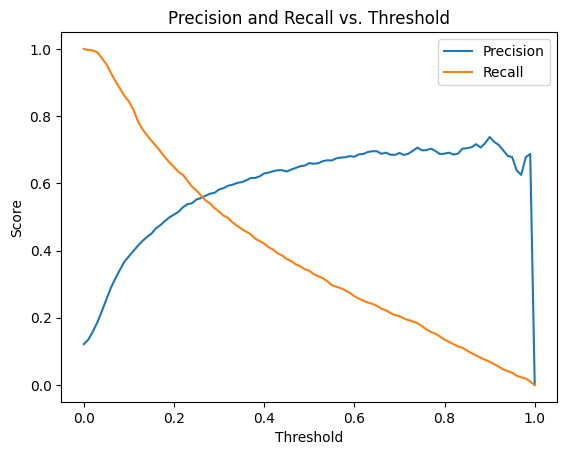

Intersection threshold: 1.000


In [18]:
thresholds = np.linspace(0, 1, 101)
precisions = []
recalls = []

for t in thresholds:
    actual_positive = (y_val == 'yes')
    predicted_positive = (y_pred_val >= t)

    tp = np.sum(actual_positive & predicted_positive)
    fp = np.sum(~actual_positive & predicted_positive)
    fn = np.sum(actual_positive & ~predicted_positive)

    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    precisions.append(precision)
    recalls.append(recall)

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')
plt.show()

# Find the threshold where precision and recall intersect
intersection_threshold = None
min_diff = float('inf')
for i in range(len(thresholds)):
    diff = abs(precisions[i] - recalls[i])
    if diff < min_diff:
        min_diff = diff
        intersection_threshold = thresholds[i]

print(f"Intersection threshold: {intersection_threshold:.3f}")

#Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F 1 = 2 ⋅ P ⋅ R P + R

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

    0.02
    0.22
    0.42
    0.62


In [19]:
f1_scores = []
for t in thresholds:
    actual_positive = (y_val == 'yes')
    predicted_positive = (y_pred_val >= t)

    tp = np.sum(actual_positive & predicted_positive)
    fp = np.sum(~actual_positive & predicted_positive)
    fn = np.sum(actual_positive & ~predicted_positive)

    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * precision * recall / (precision + recall)

    f1_scores.append(f1)


# Find the threshold with the maximum F1 score
max_f1_index = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_index]
print(f"Threshold with maximum F1 score: {max_f1_threshold:.2f}")

Threshold with maximum F1 score: 0.22


#Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

    0.0001
    0.006
    0.06
    0.26


In [20]:
from sklearn.model_selection import KFold

df_full_train = pd.concat([X_train, y_train], axis=1)

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Store AUC scores for each fold
auc_scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train_fold = df_train['y']
    X_train_fold = df_train.drop('y', axis=1)
    y_val_fold = df_val['y']
    X_val_fold = df_val.drop('y', axis=1)

    # Convert the training data to a list of dictionaries
    train_dicts = X_train_fold.to_dict(orient='records')

    # Create a DictVectorizer and fit it to the training data
    dv = DictVectorizer(sparse=False)
    X_train_encoded = dv.fit_transform(train_dicts)

    # Train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train_fold)

    # Convert the validation data to a list of dictionaries
    val_dicts = X_val_fold.to_dict(orient='records')

    # Transform the validation data using the fitted DictVectorizer
    X_val_encoded = dv.transform(val_dicts)

    # Make predictions on the validation data
    y_pred_val = model.predict_proba(X_val_encoded)[:, 1]

    # Calculate the AUC on the validation data
    auc_val = roc_auc_score(y_val_fold, y_pred_val)
    auc_scores.append(auc_val)

# Calculate the standard deviation of AUC scores
std_auc = np.std(auc_scores)
print(f"Standard deviation of AUC scores across folds: {std_auc:.3f}")

Standard deviation of AUC scores across folds: 0.005


#Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.000001, 0.001, 1]
    Initialize KFold with the same parameters as previously
    Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

    0.000001
    0.001
    1


In [21]:
C_values = [0.000001, 0.001, 1]
results = []

for C in C_values:
    auc_scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train_fold = df_train['y']
        X_train_fold = df_train.drop('y', axis=1)
        y_val_fold = df_val['y']
        X_val_fold = df_val.drop('y', axis=1)

        # Convert the training data to a list of dictionaries
        train_dicts = X_train_fold.to_dict(orient='records')

        # Create a DictVectorizer and fit it to the training data
        dv = DictVectorizer(sparse=False)
        X_train_encoded = dv.fit_transform(train_dicts)

        # Train the logistic regression model
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train_fold)

        # Convert the validation data to a list of dictionaries
        val_dicts = X_val_fold.to_dict(orient='records')

        # Transform the validation data using the fitted DictVectorizer
        X_val_encoded = dv.transform(val_dicts)

        # Make predictions on the validation data
        y_pred_val = model.predict_proba(X_val_encoded)[:, 1]

        # Calculate the AUC on the validation data
        auc_val = roc_auc_score(y_val_fold, y_pred_val)
        auc_scores.append(auc_val)

    mean_auc = round(np.mean(auc_scores), 3)
    std_auc = round(np.std(auc_scores), 3)
    results.append((C, mean_auc, std_auc))

for C, mean_auc, std_auc in results:
    print(f"C={C}: Mean AUC = {mean_auc}, Std AUC = {std_auc}")

# Find the C value with the best mean score
best_C = max(results, key=lambda x: x[1])[0]
print(f"\nThe C value that leads to the best mean score is: {best_C}")

C=1e-06: Mean AUC = 0.698, Std AUC = 0.005
C=0.001: Mean AUC = 0.853, Std AUC = 0.006
C=1: Mean AUC = 0.908, Std AUC = 0.005

The C value that leads to the best mean score is: 1
